In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv
/kaggle/input/nasa-asteroids-classification/nasa.csv
/kaggle/input/apple-quality/apple_quality.csv
/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty_By_Continent.csv
/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty_By_Country.csv
/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty.csv


In [2]:
df_apple=pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")

df_coffee=pd.read_csv("/kaggle/input/coffee-quality-with-locations-of-origin/Coffee_Qlty.csv")

df_at=pd.read_csv("/kaggle/input/nasa-asteroids-classification/nasa.csv")

df_ob = pd.read_csv("/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv")



In [3]:

df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REC_ID                1339 non-null   int64  
 1   Species               1339 non-null   object 
 2   Continent.of.Origin   1338 non-null   object 
 3   Country.of.Origin     1338 non-null   object 
 4   Harvest.Year          1279 non-null   float64
 5   Expiration            1339 non-null   object 
 6   Variety               1113 non-null   object 
 7   Color                 1069 non-null   object 
 8   Processing.Method     1169 non-null   object 
 9   Aroma                 1339 non-null   float64
 10  Flavor                1339 non-null   float64
 11  Aftertaste            1339 non-null   float64
 12  Acidity               1339 non-null   float64
 13  Body                  1339 non-null   float64
 14  Balance               1339 non-null   float64
 15  Uniformity           

In [4]:
df_coffee.isna().sum()

REC_ID                    0
Species                   0
Continent.of.Origin       1
Country.of.Origin         1
Harvest.Year             60
Expiration                0
Variety                 226
Color                   270
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Quakers                   0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

# Pre - Processing on Coffee Dataset

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Aroma', 'Flavor', 'Aftertaste', 
                    'Acidity', 'Body', 'Balance', 
                    'Uniformity', 'Clean.Cup', 'Sweetness', 
                    'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects']

categorical_features = ['Species', 'Continent.of.Origin',
                        'Country.of.Origin', 'Variety', 'Color', 'Processing.Method']

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_t', numeric_pipeline, numeric_features),
        ('cat_t', categorical_pipeline, categorical_features)
    ])


In [6]:
dataframe_transformed = preprocessor.fit_transform(df_coffee)

In [7]:
dataframe_transformed.shape

(1339, 91)

In [8]:
dataframe_transformed

<1339x91 sparse matrix of type '<class 'numpy.float64'>'
	with 25441 stored elements in Compressed Sparse Row format>

In [9]:
df_transformed = pd.DataFrame(dataframe_transformed.toarray(), columns=list(numeric_features)
                  +
                  list(
                      preprocessor
                      .named_transformers_['cat_t']['onehot']
                      .get_feature_names_out(input_features=categorical_features)))


In [10]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 91 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Aroma                                        1339 non-null   float64
 1   Flavor                                       1339 non-null   float64
 2   Aftertaste                                   1339 non-null   float64
 3   Acidity                                      1339 non-null   float64
 4   Body                                         1339 non-null   float64
 5   Balance                                      1339 non-null   float64
 6   Uniformity                                   1339 non-null   float64
 7   Clean.Cup                                    1339 non-null   float64
 8   Sweetness                                    1339 non-null   float64
 9   Moisture                                     1339 non-null   float64
 10  

In [11]:
preprocessor.named_transformers_

{'num_t': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler())]),
 'cat_t': Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                 ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
 'remainder': 'drop'}

In [12]:
df_transformed.columns

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers',
       'Category.One.Defects', 'Category.Two.Defects', 'Species_Arabica',
       'Species_Robusta', 'Continent.of.Origin_Africa',
       'Continent.of.Origin_Asia', 'Continent.of.Origin_North America',
       'Continent.of.Origin_Oceania', 'Continent.of.Origin_South America',
       'Country.of.Origin_Brazil', 'Country.of.Origin_Burundi',
       'Country.of.Origin_China', 'Country.of.Origin_Colombia',
       'Country.of.Origin_Costa Rica', 'Country.of.Origin_Cote dIvoire',
       'Country.of.Origin_Ecuador', 'Country.of.Origin_El Salvador',
       'Country.of.Origin_Ethiopia', 'Country.of.Origin_Guatemala',
       'Country.of.Origin_Haiti', 'Country.of.Origin_Honduras',
       'Country.of.Origin_India', 'Country.of.Origin_Indonesia',
       'Country.of.Origin_Japan', 'Country.of.Origin_Kenya',
       'Country.of.Origin_Laos', 'Country.of.Origin_Mal

# Linear Regression  [Coffee Dataset]

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X = df_transformed[numeric_features].drop('Balance', axis=1)  

y = df_transformed['Balance']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

for i in X_train, X_test, y_train, y_test:
    print(len(X_train), len(X_test),len(y_train) ,len(X_test))

1071 268 1071 268
1071 268 1071 268
1071 268 1071 268
1071 268 1071 268


In [16]:
lr = LinearRegression()

lr.fit(X_train, y_train)



LinearRegression()

In [17]:

predictions = lr.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

import numpy as np

predictions = lr.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, predictions)
print(f"R-squared Score: {r2}")

Mean Absolute Error (MAE): 0.3183597214858444
Mean Squared Error (MSE): 0.23774459607519216
Root Mean Squared Error (RMSE): 0.48759060293979434
R-squared Score: 0.8787140871018561


In [19]:
print(lr.coef_,lr.intercept_)

[ 0.02327391  0.12057925  0.30332074  0.08684953  0.34685733  0.05973985
  0.02617943  0.01790157 -0.06031566  0.01145763 -0.00160337 -0.0193608 ] -0.010659389085642722


# Logistic Regression  [Coffee Dataset]

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df_transformed[numeric_features]

y = df_transformed['Species_Arabica'].apply(lambda x: 1 if x == 1 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


logr = LogisticRegression()

logr.fit(X_train, y_train)


LogisticRegression()

In [21]:
predictions = logr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9869402985074627


   #                                                Support Vector Machine =>

# 1. SVC     [Coffee Dataset]

In [22]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [23]:
X = df_transformed[['Aroma','Flavor']]
y = df_transformed['Color_Green']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [24]:
num_zeros = np.size(y) - np.count_nonzero(y)
num_ones = np.count_nonzero(y == 1)

print(num_zeros, num_ones)

199 1140


In [25]:
def sv_classifier(k , g ,c):
    sv_c = SVC(kernel=k , gamma =g,C = c )
    sv_c.fit(X_train,y_train)
    DecisionBoundaryDisplay.from_estimator(
        sv_c,
        X_train,
        response_method="predict",
        xlabel ='Aroma' ,
        ylabel = 'Flavor'
    )
    plt.scatter(X_train['Aroma'], X_train['Flavor'], c=y_train , s=20 ,edgecolors='k')
    plt.show()
    return sv_c.score(X_test,y_test)

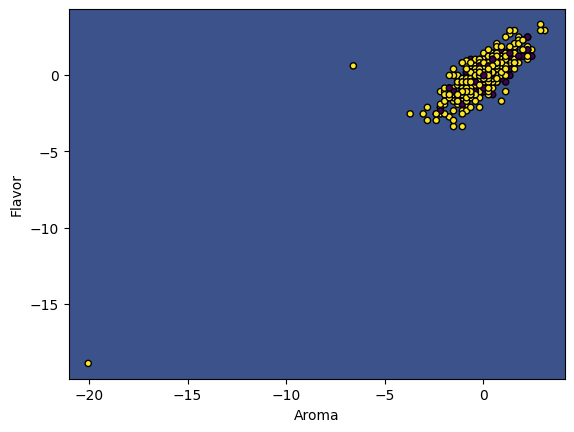

In [26]:
score1 = sv_classifier('rbf',0.1,1)

In [27]:
print(score1)

0.8582089552238806


# Hyperparam Optimization for SVM

# GridSearchCV on SVC   [Coffee Dataset]

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'C':[0.1,1,10,100],
    'gamma':[1 ,0.1 , 0.01  , 0.001 , 0.0001 ]
}

grid = GridSearchCV(SVC() , param_grid , verbose=5)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.846 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.846 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.850 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.850 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.850 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.846 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=5)

In [29]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

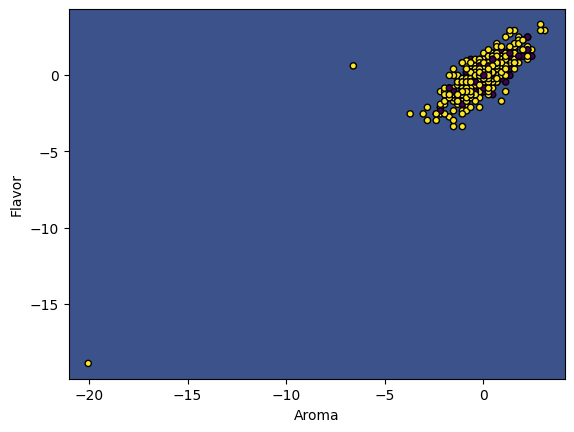

In [30]:
score2 = sv_classifier('rbf',1,0.1)

In [31]:
score2

0.8582089552238806

# RandomizedSearchCV  on  SVC  [Coffee Dataset]

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [33]:
param_distributions = {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': reciprocal(0.001, 0.1),
        'C': uniform(1, 10)
    }

random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=200, cv=5)

 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=200,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fef46c40220>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fef46c2f790>,
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [34]:
    print("Best parameters: ", random_search.best_params_)


Best parameters:  {'C': 10.088718435444328, 'gamma': 0.07944820789655045, 'kernel': 'rbf'}


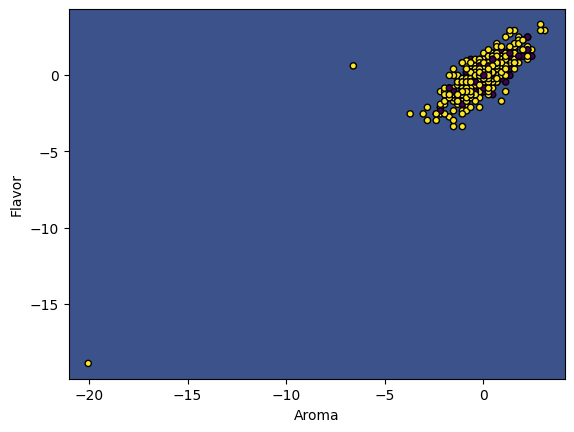

In [35]:
score3 = sv_classifier('poly',0.0038853241795342953,7.9036843879381395)

In [36]:
score3

0.8582089552238806

# SVR With Kfold Cross validation [Coffee Dataset]

In [37]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
import numpy as np

X = df_transformed[ ['Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 
                    'Uniformity','Moisture']]
y = df_transformed['Sweetness']

svr = SVR(kernel='linear')

kfold = KFold(n_splits=10)

scores = []
for train_index, test_index in kfold.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    svr.fit(X_train, y_train)
    
    
    score = svr.score(X_test, y_test)
    scores.append(score)


print(f"Mean Cross Validation Score: {np.mean(scores)}")


Mean Cross Validation Score: -0.08691082597819037


In [38]:
X.shape

(1339, 7)

# GridSearchCV on SVR  [Coffee Dataset]

In [39]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.0001, 0.001, 0.01],
    'gamma': [0.0001, 0.001, 0.01]
}

grid = GridSearchCV(svr, param_grid, cv=5, verbose=2, n_jobs=-1)

grid.fit(X, y)

best_params = grid.best_params_
print(f"Best parameters: {best_params}")

best_score = grid.best_score_
print(f"Best score: {best_score}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'C': 0.1, 'epsilon': 0.01, 'gamma': 0.0001}
Best score: -0.06214236123016721


#  Decision Tree Classifier  [Coffee Dataset]

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
X = df_transformed[numeric_features]
y = df_transformed[['Country.of.Origin_India']]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 )


In [42]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train ,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [43]:
y_pred = dt.predict(X_test)

In [44]:
accuracy_score(y_pred , y_test)

0.9925373134328358

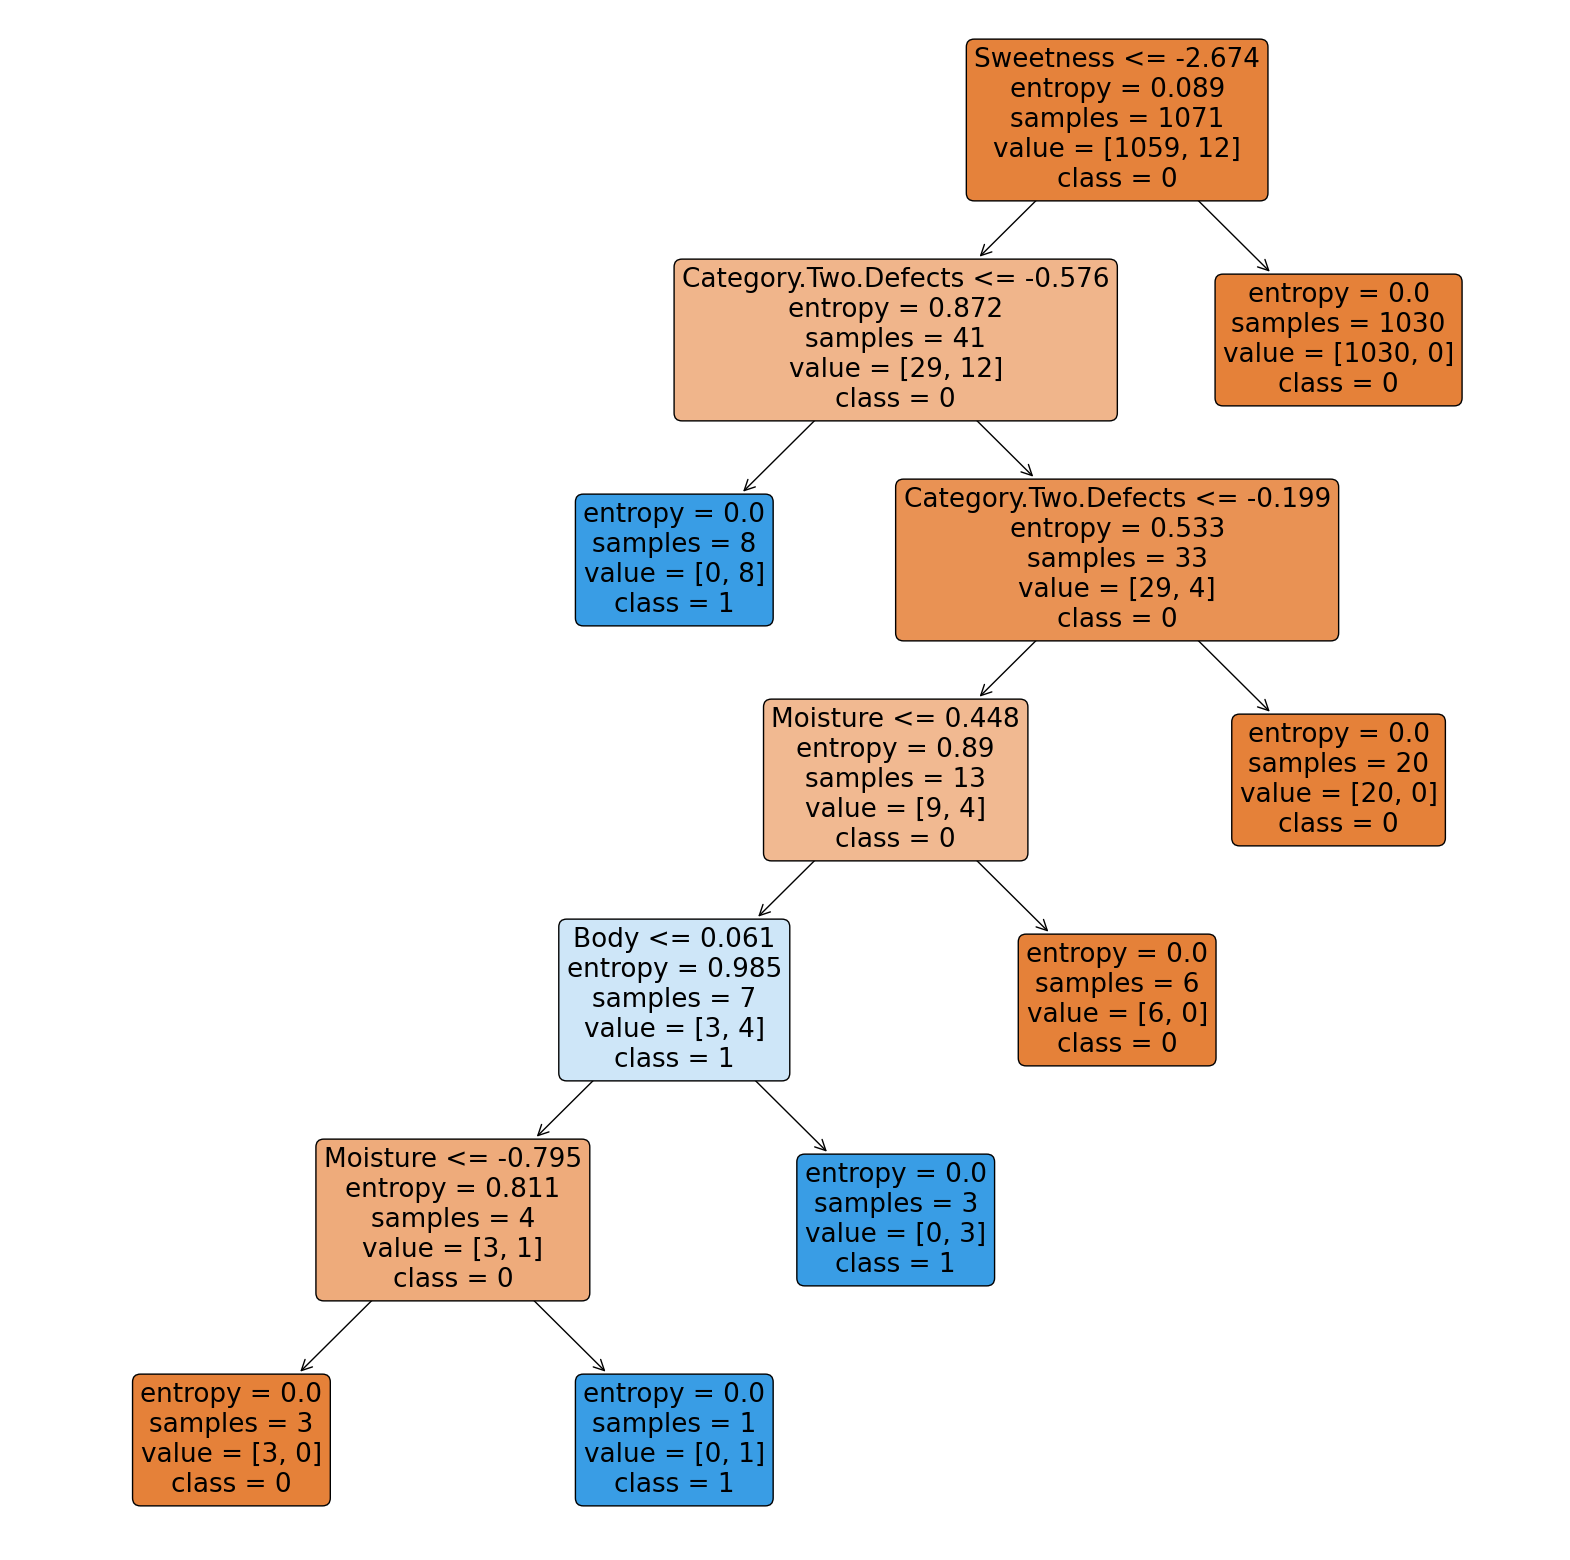

In [45]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20)) 

tree.plot_tree(dt, feature_names=numeric_features, 
               class_names=['0','1'],
               filled=True, 
               rounded=True,ax=ax)
plt.show()


# Decision Tree Regressor [Coffee Dataset]

In [46]:
from sklearn.tree import DecisionTreeRegressor

X = df_transformed[numeric_features]
y = df_transformed[['Variety_Arusha']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
dtr = DecisionTreeRegressor(criterion='poisson', random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', random_state=42)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = dtr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R² score): {r2}")


Mean Absolute Error (MAE): 0.005088436576827953
Mean Squared Error (MSE): 0.0006218658654712581
Root Mean Squared Error (RMSE): 0.02493723852938128
R-squared (R² score): 0.0


# Random Forest  [Asteroid Dataset]

In [49]:
df_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [50]:
numeric_columns = df_at._get_numeric_data()


In [51]:
numeric_columns

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler()



In [53]:
X = df_at[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 
           'Relative Velocity km per sec',    'Miss Dist.(Astronomical)', 
           'Eccentricity', 'Semi Major Axis', 'Inclination', 'Perihelion Distance']]


y = df_at['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

rfclf = RandomForestClassifier(n_estimators=100, random_state=42)

rfclf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred = rfclf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.917910447761194


# RandomSearchCV on Random Forest Classifier [Asteroid Dataset]

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(rfclf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42)

random_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


[CV] END ....................C=1, epsilon=0.01, gamma=0.0001; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.1s
[CV] END ...................C=1, epsilon=0.0001, gamma=0.001; total time=   0.1s
[CV] END ..................C=1, epsilon=0.0001, gamma=0.0001; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ...................C=1, epsilon=0.0001, gamma=0.001; total time=   0.1s
[CV] END ..................C=1, epsilon=0.0001, gamma=0.0001; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.001, gamma=0.01; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=1, epsilon=0.0001, gamma=0.01; total time=   0.1s
[CV] END ...................C=1, epsilon=0.001, gamma=0.0001; total time=   0.1s
[CV] END ...................

# PCA [Apple Quality Dataset]

In [56]:
df_apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [57]:
df_apple = df_apple[:-1]
df_apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [58]:
df_apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [59]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_apple.drop('Quality', axis=1)
y = df_apple['Quality']

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)



In [60]:
print("Principal components:")
print(X_pca)


Principal components:
[[-1.99949977e+03  1.10317401e+00]
 [-1.99849994e+03  4.13041211e-01]
 [-1.99750006e+03  2.57189210e+00]
 ...
 [ 1.99750020e+03 -3.13731445e+00]
 [ 1.99850029e+03 -6.19440463e-01]
 [ 1.99949994e+03  2.27834534e+00]]


In [61]:
y_reshaped = np.reshape(y, (4000, 1))
temp = np.concatenate([X_pca, y_reshaped], axis=1)
reduced_df = pd.DataFrame(temp, columns=['PC1', 'PC2', 'Quality'])
reduced_df

,PC1,PC2,Quality
0,-1999.499771,1.103174,good
1,-1998.499937,0.413041,good
2,-1997.500057,2.571892,bad
3,-1996.499969,3.977467,good
4,-1995.500053,2.43146,good
...,...,...,...
3995,1995.500002,-1.024934,bad
3996,1996.499908,1.902259,good
3997,1997.500201,-3.137314,bad
3998,1998.500289,-0.61944,good


In [62]:
X = reduced_df[['PC1','PC2']]

y = reduced_df['Quality'].map({'good': 1, 'bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [63]:
accuracy_score(y_pred ,y_test)

0.48333333333333334

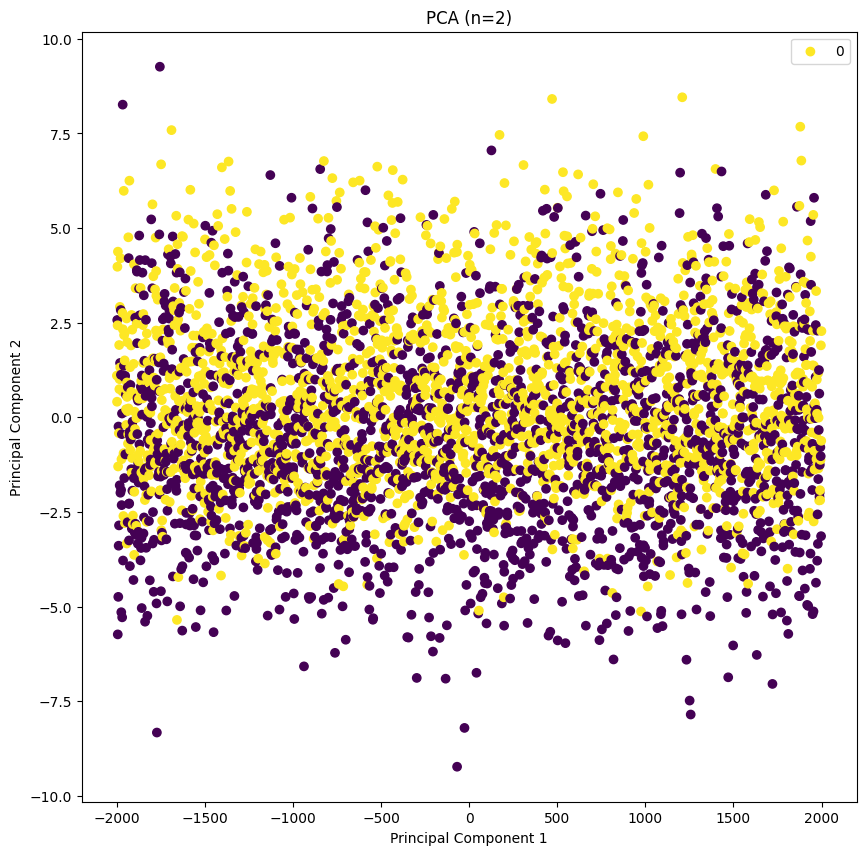

In [64]:
plt.figure(figsize=(10, 10))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (n=2)")
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Quality'].map({'good': 1, 'bad': 0}))
plt.legend([0, 1])
plt.show()

#  LDA  [Apple Quality Dataset]

In [65]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [66]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [67]:

y = df_apple['Quality'].map({'good': 1, 'bad': 0})

X = df_apple[['Size','Weight',
              'Sweetness','Crunchiness',
              'Juiciness','Ripeness']]





In [68]:
lda = LinearDiscriminantAnalysis()

reduced_X = lda.fit_transform(X, y)


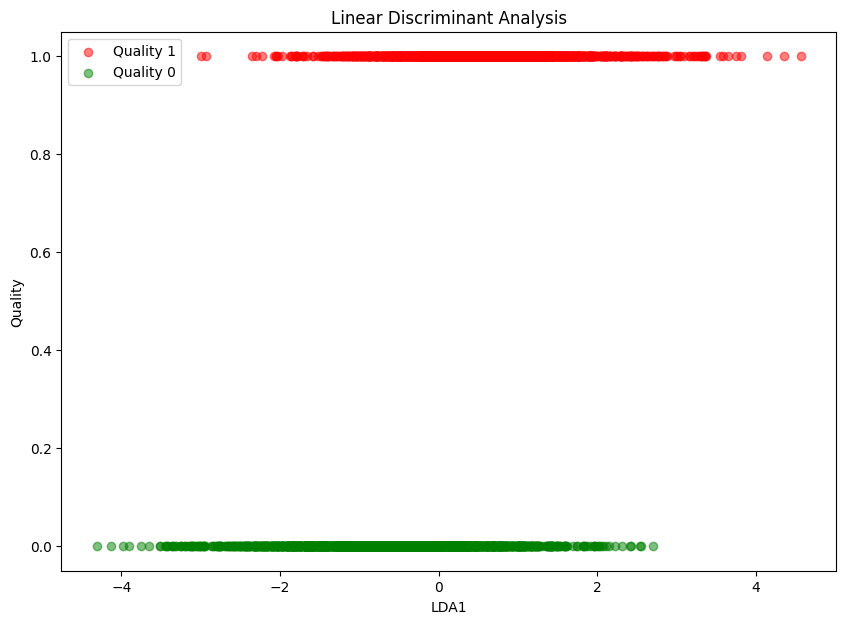

In [69]:
df_lda = pd.DataFrame(data=reduced_X, columns=["LDA1"])
df_lda["Quality"] = y

plt.figure(figsize=(10, 7))
for quality, color in zip(df_lda["Quality"].unique(), ["red", "green"]):
    plt.scatter(df_lda[df_lda["Quality"] == quality]["LDA1"], 
                df_lda[df_lda["Quality"] == quality]["Quality"], 
                color=color, 
                alpha=0.5, 
                label=f"Quality {quality}")
plt.xlabel("LDA1")
plt.ylabel("Quality")
plt.title("Linear Discriminant Analysis")
plt.legend()
plt.show()

In [70]:
y

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

# Ensembling 

# 1. Stacking  [Apple Quality Dataset]

In [71]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

In [73]:

y = df_apple['Quality'].map({'good': 1, 'bad': 0})

X = df_apple[['Size','Weight',
              'Sweetness','Crunchiness',
              'Juiciness','Ripeness']]





In [74]:
dtc = DecisionTreeClassifier()
xgb = xgboost.XGBClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [75]:
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb)]
scores = []
for name, model in clf:
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    scores.append((name, score.mean()))
print(scores)

[('dtc', 0.7969999999999999), ('rfc', 0.8622500000000001), ('knn', 0.87375), ('xgb', 0.8632500000000001)]


In [76]:
lr = LogisticRegression()

stack_model = StackingClassifier(estimators=clf, final_estimator=lr)

In [77]:
cross_val_score(stack_model, X, y, cv=5, scoring='accuracy').mean()

0.88025

# 2. Bagging  [Asteroid_Dataset]

In [78]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator=SVC(),n_estimators=10, random_state=42).fit(X, y)



In [79]:
df_at

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [80]:
X = df_at[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 
           'Relative Velocity km per sec',    'Miss Dist.(Astronomical)', 
           'Eccentricity', 'Semi Major Axis', 'Inclination', 'Perihelion Distance']]


y = df_at['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [81]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the BaggingClassifier model: {accuracy:.2f}")


Accuracy of the BaggingClassifier model: 0.89


# 3.  Boosting  [Obesity_Dataset]

In [82]:
df_ob

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [83]:
df_ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 
                        'CAEC', 'MTRANS', 'NObeyesdad']

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

X_transformed = preprocessor.fit_transform(df_ob)


In [85]:
pd.DataFrame(X_transformed).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2111 non-null   float64
 1   1       2111 non-null   float64
 2   2       2111 non-null   float64
 3   3       2111 non-null   float64
 4   4       2111 non-null   float64
 5   5       2111 non-null   float64
 6   6       2111 non-null   float64
 7   7       2111 non-null   float64
 8   8       2111 non-null   float64
 9   9       2111 non-null   float64
 10  10      2111 non-null   float64
 11  11      2111 non-null   float64
 12  12      2111 non-null   float64
 13  13      2111 non-null   float64
 14  14      2111 non-null   float64
 15  15      2111 non-null   float64
 16  16      2111 non-null   float64
 17  17      2111 non-null   float64
 18  18      2111 non-null   float64
 19  19      2111 non-null   float64
 20  20      2111 non-null   float64
 21  21      2111 non-null   float64
 22  

In [86]:
import pandas as pd

ohe_categories = preprocessor.named_transformers_['cat']['encoder'].categories_

ohe_feature_names = [f"{col}_{val}" for col, vals in zip(categorical_features, ohe_categories) for val in vals]

all_feature_names = numerical_features + ohe_feature_names

df = pd.DataFrame(X_transformed, columns=all_feature_names)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   float64
 9   Gender_Male                         2111 non-null   float64
 10  CALC_Always                         2111 non-null   float64
 11  CALC_Frequently                     2111 no

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = df[numerical_features]
y = df[['MTRANS_Walking']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(random_state=42)

clf.fit(X_train, y_train.values.ravel())


GradientBoostingClassifier(random_state=42)

In [89]:
y_pred = clf.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.983451536643026

In [91]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)

xgb_clf.fit(X_train, y_train.values.ravel())

y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"The accuracy of the XGBoost Classifier is {accuracy_xgb}.")


The accuracy of the XGBoost Classifier is 0.9787234042553191.


# K - Means Clustering   [Obesity_Dataset]

In [92]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'CALC_Always', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'FAVC_no', 'FAVC_yes', 'SCC_no', 'SCC_yes',
       'SMOKE_no', 'SMOKE_yes', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II'],
      dtype='object')

In [93]:
from sklearn.cluster import KMeans

X = df

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

clusters = kmeans.labels_

df['Cluster'] = clusters




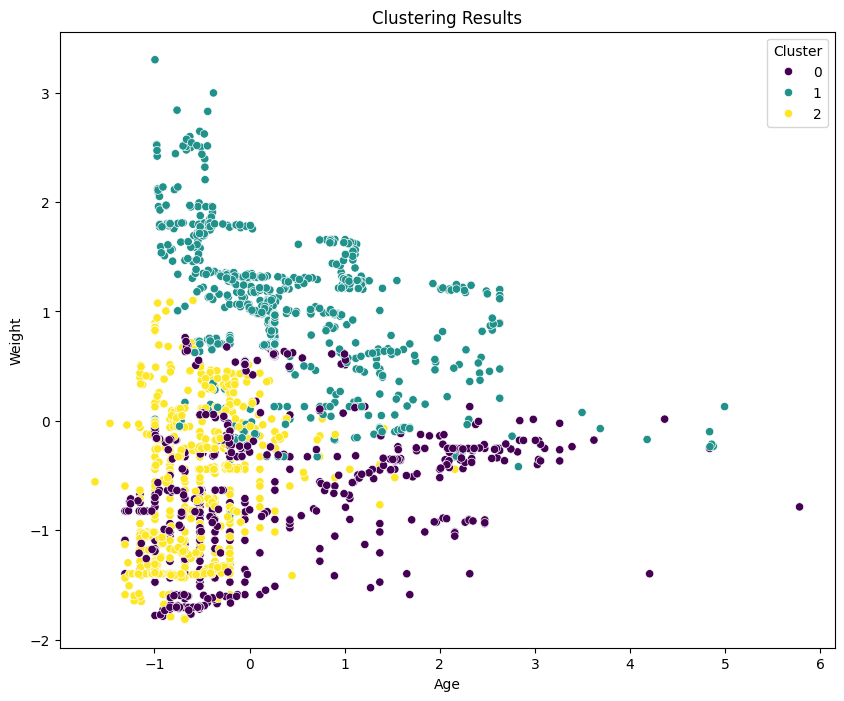

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(x='Age', y='Weight', hue='Cluster', data=df, palette='viridis')

plt.title('Clustering Results')
plt.show()


#  Aggolomerative Clustering  [Obesity_Dataset]

In [95]:
from sklearn.cluster import AgglomerativeClustering

X = df

agg_clustering = AgglomerativeClustering(n_clusters=3)

clusters_agg = agg_clustering.fit_predict(X)

df['Cluster_Agg'] = clusters_agg

df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,Cluster,Cluster_Agg
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0


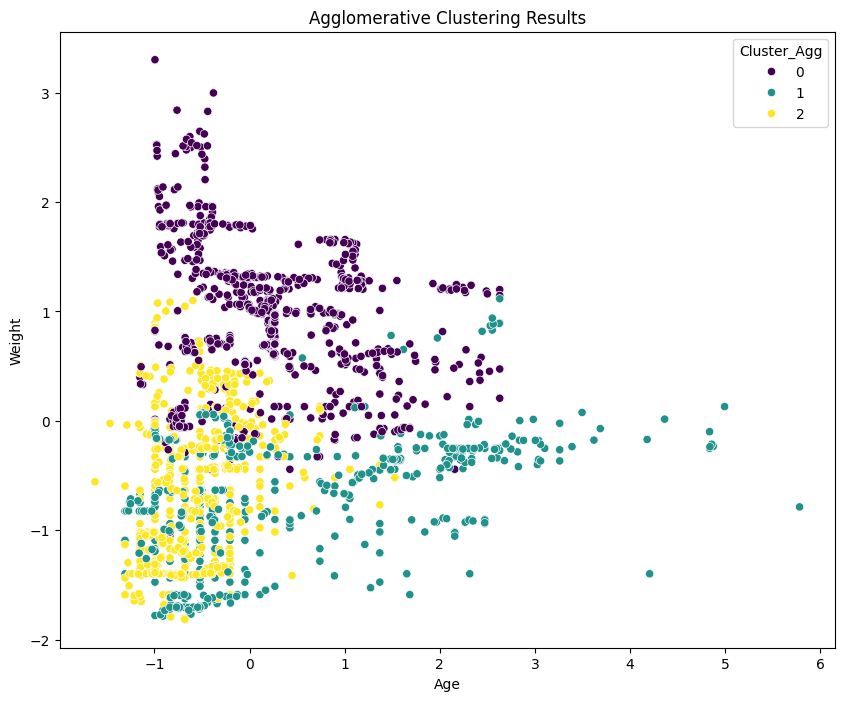

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(x='Age', y='Weight', hue='Cluster_Agg', data=df, palette='viridis')

plt.title('Agglomerative Clustering Results')
plt.show()


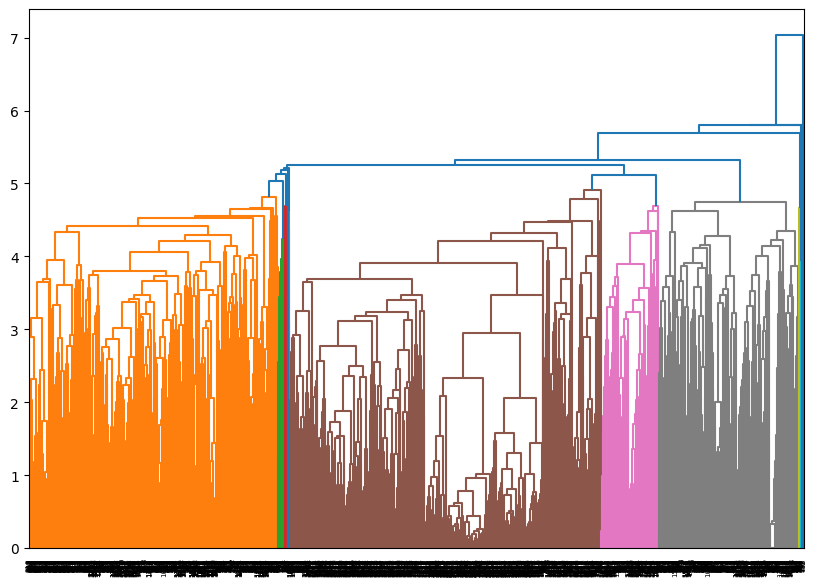

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = df

linked = linkage(X, 'average')

plt.figure(figsize=(10, 7))

dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)


plt.show()


# KNN Classifier  [Obesity_Dataset]

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('MTRANS_Walking', axis=1)
y = df['MTRANS_Walking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy of the KNN Classifier is {accuracy}.")


The accuracy of the KNN Classifier is 0.9810874704491725.
